# Определение выгодного тарифа для телеком компании.

В вашем распоряжении данные компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования**:
1. Выявить тариф, который приносит больше денег.

**Ход исследования**

Проведем предобработку данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Далее проведем предварительный анализ использования тарифов на выборке клиентов. Проанализируем поведение клиентов при использовании услуг оператора. Затем напишем рекомендации по оптимальным наборам услуг для пользователей.

Проверим гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов.

В конце напишем общий вывод.

Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Подготовка данных.
 3. Анализ данных.
 4. Определение портрета пользователя каждого региона. 
 5. Общий вывод.

**Описание тарифов**

**Тариф «Смарт»**

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
    
**Тариф «Ультра»**

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

### Определение выгодного тарифа для телеком компании.
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Изучение данных из файла:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
#### Часть 2. Предобработка данных:
* [1. Пропуски значений.](#2-bullet)
* [2. Нахождение и исправление аномалий и ошибок.](#3-bullet)
#### Часть 3. Анализ данных:
* [1. Расчет помесячных расходов каждого пользователя.](#4-bullet)
* [2. Расчет помесячной выручки с каждого пользователя.](#5-bullet)
* [3. Расчет потребляемого количества минут, сообщений и интернет-трафика пользователями каждого тарифа в месяц.](#6-bullet)
#### Часть 4. Проверка гипотез:
##### Итоги исследования

## Изучение данных из файла

<a id='1-bullet'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd # импорт библиотеки pandas
import math #импорт библиотеки math
from scipy import stats as st #импорт библиотеки stats
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot

Прочитаем файлы  из папки /datasets и сохраним их в следующих переменных:

* `D:\\Programs\\calls.csv` - `df_calls`
* `D:\\Programs\\internet.csv` - `df_internet`
* `D:\\Programs\\messages.csv` - `df_messages`
* `D:\\Programs\\tariffs.csv` - `df_tariffs`
* `D:\\Programs\\users.csv` - `df_users`

In [2]:
df_calls = pd.read_csv("D:\\Programs\\calls.csv", parse_dates=['call_date'])
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В таблице 4 столбца. Тип данных в столбцах — `object`, `int64`, `float64`. 

Согласно документации к данным:
* `id`  — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [4]:
df_internet = pd.read_csv("D:\\Programs\\internet.csv", parse_dates=['session_date'], index_col=0)
df_internet.head(10)

,id,mb_used,session_date,user_id
Unnamed: 0,,,,
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


В таблице 4 столбца. Тип данных в столбцах — `object`, `int64`, `float64`. 
Согласно документации к данным:
* `id`  — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date ` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [6]:
df_messages = pd.read_csv("D:\\Programs\\messages.csv", parse_dates=['message_date'])
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


В таблице 3 столбца. Тип данных в столбцах — `object`, `int64`.

Согласно документации к данным:
* `id`  — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id ` — идентификатор пользователя, отправившего сообщение

In [8]:
df_tariffs = pd.read_csv("D:\\Programs\\tariffs.csv")
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 столбцов. Тип данных в столбцах — `object`, `int64`. 

Согласно документации к данным:
* `tariff_name`  — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
df_users = pd.read_csv("D:\\Programs\\users.csv", parse_dates=['reg_date'])
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


В таблице 8 столбцов. Тип данных в столбцах — `object`, `int64`. 

Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

### Вывод

В таблице `df_users` есть пропуски данных. Так как в документации сказано, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных, удалять или заполнять их не нужно. В некоторых таблицах неверный тип данных в столбцах с датой. Необходимо подготовить таблицы к анализу

## Предобработка данных

<a id='2-bullet'></a>
### Пропуски значений.

В процессе обзора данных не было выявлено явных пропусков значений.

<a id='3-bullet'></a>
### Нахождение и исправление аномалий и ошибок.

В процессе обзора данных были исправлен неправильный тип данных у столбцов, а также удален лишний столбец в таблице `df_internet`.

Также проверим нет ли аномалий в таблицах и нет ли дубликатов в столбце `user_id`, т.к. этот столбец потом нужен для объединения.

In [12]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [13]:
df_users['user_id'].duplicated().sum()

0

### Вывод

Данные готовы к анализу

## Анализ данных.

<a id='4-bullet'></a>
### Расчет помесячных расходов каждого пользователя.

Далее для каждого пользователя посчитаем:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя 

Добавим столбцы месяцев в таблицы.

In [14]:
df_calls['month']=df_calls['call_date'].dt.month
df_messages['month']=df_messages['message_date'].dt.month
df_internet['month']=df_internet['session_date'].dt.month

Округлим минуты до целого в сторону большего числа

In [15]:
df_calls['duration'] = df_calls['duration'].apply(math.ceil)

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

array([[<AxesSubplot:title={'center':'calls_count'}>]], dtype=object)

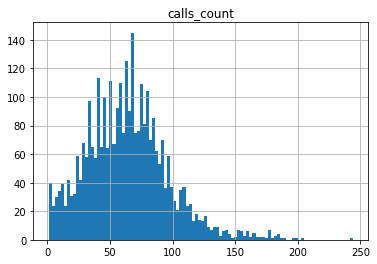

In [16]:
pivot_calls_count = df_calls.groupby(['user_id','month']).agg(calls_count=('id','count')) #сводная таблица по количеству сделанных звонков
pivot_calls_count.reset_index() #изменение индексов
pivot_calls_count.hist(bins=100) #построение гистограммы

array([[<AxesSubplot:title={'center':'calls_sum'}>]], dtype=object)

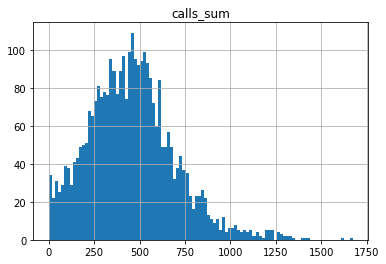

In [17]:
pivot_calls_sum = df_calls.groupby(['user_id','month']).agg(calls_sum=('duration','sum')) #сводная таблица по количеству потраченных минут
pivot_calls_sum.reset_index() #изменение индексов
pivot_calls_sum.hist(bins=100) #построение гистограммы

Теперь посчитаем количество отправленных сообщений по месяцам для каждого пользователя

array([[<AxesSubplot:title={'center':'messages_count'}>]], dtype=object)

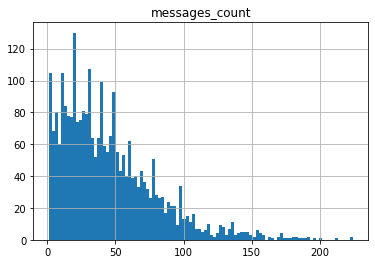

In [18]:
pivot_messages_count = df_messages.groupby(['user_id','month']).agg(messages_count=('id','count')) #сводная таблица по количеству потраченных смс
pivot_messages_count.reset_index() #изменение индексов
pivot_messages_count.hist(bins=100) #построение гистограммы

Посчитаем объем израсходованного трафика для каждого пользователя

array([[<AxesSubplot:title={'center':'internet_sum'}>]], dtype=object)

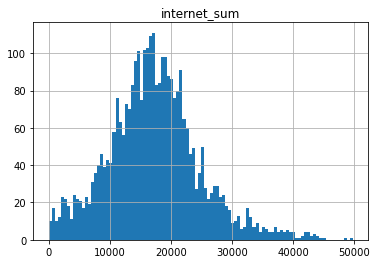

In [19]:
pivot_internet_sum = df_internet.groupby(['user_id','month']).agg(internet_sum=('mb_used','sum')) #сводная таблица по количеству потраченных Мб интернета
pivot_internet_sum.reset_index() #изменение индексов
pivot_internet_sum.hist(bins=100) #построение гистограммы

<a id='5-bullet'></a>
### Расчет помесячной выручки с каждого пользователя.

Для подсчета помесячной выручки с каждого пользователя необходимо объединить таблицы `pivot_calls_count`, `pivot_calls_sum`, `pivot_messages_count`, `pivot_internet_sum`, `user_id` в одну таблицу df.

In [20]:
df = pivot_calls_count.merge(pivot_calls_sum, on=['user_id','month'], how='outer') #объединение таблиц
df.head(10)

calls_count  calls_sum
user_id month                        
1000    5               22        159
        6               43        172
        7               47        340
        8               52        408
        9               58        466
        10              57        350
        11              43        338
        12              46        333
1001    11              59        430
        12              63        414

In [21]:
df = df.merge(pivot_messages_count, on=['user_id','month'], how='outer') #объединение таблиц
df.head(10)

calls_count  calls_sum  messages_count
user_id month                                        
1000    5             22.0      159.0            22.0
        6             43.0      172.0            60.0
        7             47.0      340.0            75.0
        8             52.0      408.0            81.0
        9             58.0      466.0            57.0
        10            57.0      350.0            73.0
        11            43.0      338.0            58.0
        12            46.0      333.0            70.0
1001    11            59.0      430.0             NaN
        12            63.0      414.0             NaN

In [22]:
df = df.merge(pivot_internet_sum, on=['user_id','month'], how='outer') #объединение таблиц
df.head(10)

calls_count  calls_sum  messages_count  internet_sum
user_id month                                                      
1000    5             22.0      159.0            22.0       2253.49
        6             43.0      172.0            60.0      23233.77
        7             47.0      340.0            75.0      14003.64
        8             52.0      408.0            81.0      14055.93
        9             58.0      466.0            57.0      14568.91
        10            57.0      350.0            73.0      14702.49
        11            43.0      338.0            58.0      14756.47
        12            46.0      333.0            70.0       9817.61
1001    11            59.0      430.0             NaN      18429.34
        12            63.0      414.0             NaN      14036.66

In [23]:
df = df.merge(df_users, on='user_id', how='outer') #объединение таблиц
df.head(10)

,user_id,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,22.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,57.0,350.0,73.0,14702.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,43.0,338.0,58.0,14756.47,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,46.0,333.0,70.0,9817.61,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,59.0,430.0,NaN,18429.34,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,63.0,414.0,NaN,14036.66,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [24]:
df = df.merge(df_tariffs, on='tariff', how='outer') #объединение таблиц

При объединении таблиц появилось два новых пользователя, у которых нет расходов минут, сообщений и гигабайт. Удалим их

In [25]:
df = df.drop(labels = [985,3215],axis = 0)

In [26]:
df=df.drop(['age','churn_date','first_name','last_name','reg_date'],axis=1) #удаление столбцов

In [27]:
df.head(10)

,user_id,calls_count,calls_sum,messages_count,internet_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,1000,57.0,350.0,73.0,14702.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,1000,43.0,338.0,58.0,14756.47,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,1000,46.0,333.0,70.0,9817.61,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,1003,55.0,380.0,37.0,8565.21,Москва,ultra,1000,30720,3000,1950,150,1,1
9,1003,134.0,961.0,91.0,12468.87,Москва,ultra,1000,30720,3000,1950,150,1,1


Заполним пропуски нулевыми значениями

In [28]:
df[['calls_count','calls_sum','messages_count','internet_sum']] = df[['calls_count','calls_sum','messages_count','internet_sum']].fillna(0)

Создадим функцию, которая посчитает месячную выручку с каждого клиента. Функция вычтет бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножит на значение из тарифного плана; прибавит абонентскую плату, соответствующую тарифному плану

In [29]:
def income(row): # создание функции для 
    money = 0
    try:
        if row['calls_sum'] > row['minutes_included']:
            money = (row['calls_sum'] - row['minutes_included'])*row['rub_per_minute']
        if row['messages_count'] > row['messages_included']:
            money = (row['messages_count'] - row['messages_included'])*row['rub_per_message']
        if row['internet_sum'] > row['mb_per_month_included']:
            money = (math.ceil((row['internet_sum'] - row['mb_per_month_included'])/1024))*row['rub_per_gb']
        return money + row['rub_monthly_fee']
    except (ValueError, ZeroDivisionError):
        display(row)
        return NaN 

In [30]:
df['income'] = df.apply(income,axis=1) #применение функции к таблице
df.head(10)

,user_id,calls_count,calls_sum,messages_count,internet_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,57.0,350.0,73.0,14702.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,43.0,338.0,58.0,14756.47,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,46.0,333.0,70.0,9817.61,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,55.0,380.0,37.0,8565.21,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,134.0,961.0,91.0,12468.87,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0


<a id='6-bullet'></a>
### Расчет потребляемого количества минут, сообщений и интернет-трафика пользователями каждого тарифа в месяц.

Далее посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. По каждому параметру построим гистограммы. Посчитаем среднее количество, дисперсию и стандартное отклонение. Результат оформим в сводной таблице.

,tariff,mean,var,std
0,smart,417.934948,36219.315784,190.313730
1,ultra,526.623350,100873.633397,317.606098


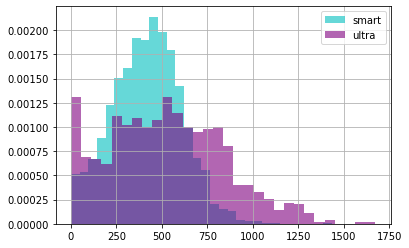

In [31]:
calls = df.groupby('tariff').agg({'calls_sum':['mean','var','std']}).reset_index() #сводная таблица 
calls.columns = ['tariff', 'mean','var','std']
df.loc[df['tariff'] == 'smart', 'calls_sum'].hist(bins=30, alpha=0.6, color='c', label='smart', density=True)
df.loc[df['tariff'] == 'ultra', 'calls_sum'].hist(bins=30, alpha=0.6, color='purple', label='ultra', density=True)
plt.legend()
calls

Набор данных звонков в тарифе `Smart` и `Ultra` скошены влево

,tariff,mean,var,std
0,smart,33.384029,796.812958,28.227876
1,ultra,49.363452,2285.266143,47.804457


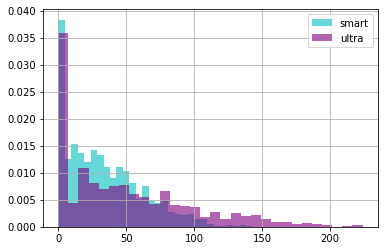

In [32]:
messages = df.groupby('tariff').agg({'messages_count':['mean','var','std']}).reset_index()
messages.columns = ['tariff', 'mean','var','std']
df.loc[df['tariff'] == 'smart', 'messages_count'].hist(bins=30, alpha=0.6, color='c', label='smart', density=True)
df.loc[df['tariff'] == 'ultra', 'messages_count'].hist(bins=30, alpha=0.6, color='purple', label='ultra', density=True)
plt.legend()
messages

Набор данных сообщений в тарифе `Smart` и `Ultra` скошены влево. Это распределение Пуассона.

,tariff,mean,var,std
0,smart,16208.386990,3.446250e+07,5870.476681
1,ultra,19468.805208,1.017510e+08,10087.170752


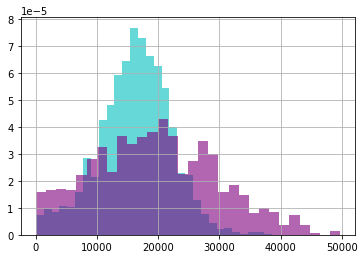

In [33]:
internet = df.groupby('tariff').agg({'internet_sum':['mean','var','std']}).reset_index()
internet.columns = ['tariff', 'mean','var','std']
df.loc[df['tariff'] == 'smart', 'internet_sum'].hist(bins=30, alpha=0.6, color='c', label='smart', density=True)
df.loc[df['tariff'] == 'ultra', 'internet_sum'].hist(bins=30, alpha=0.6, color='purple', label='ultra', density=True)
internet

Набор данных интернета в тарифе `Smart` и `Ultra` распределены нормально

### Вывод

Средние показатели звонков, сообщений и Мбайт интернета различаются на 30, 56 и 21 процент соотвественно. У тариффа "Ультра" больше разброс.

## Проверка гипотез

Для начала сформулируем нулевую гипотезу. В техническом задании сказано, что необходимо проверить различаются ли средняя выручка пользователей тарифов «Ультра» и «Смарт». Нулевая гипотеза будет выглядеть следующим образом: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу t-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам

In [34]:
results=st.ttest_ind(
    df.query('tariff=="smart"')['income'], 
    df.query('tariff=="ultra"')['income'])
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.634158999848825e-247
Отвергаем нулевую гипотезу


In [35]:
df.query('tariff=="ultra"')['income'].isna().sum()

0

p-значение получилось меньше, чем критический уровень статистической значимости alpha. Это говорит о значимом различии между средними выручками пользователей тарифа «Ультра» и «Смарт».

Далее проверим следущую гипотезу из технического задания: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Для проверки гипотез проведем также t-тест.

In [36]:
results=st.ttest_ind(
    df.query('city=="Москва"')['income'], 
    df.query('city!="Москва"')['income'])
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16156029276755443
Не получилось отвергнуть нулевую гипотезу


Так как p-значение получилось больше критического уровня статистической значимости, статистически средняя выручка пользователей из Москвы отличается не значительно от выручки пользователей из других регионов.

## Общий вывод

На основе анализа, можно сделать вывод, что в средняя выручка между двумя тарифами отличается между собой. Также можно сказать, что средняя выручка из Москвы не отличается от выручки пользователей из регионов.

In [37]:
df.loc[df['tariff'] == 'ultra','income'].mean() #средний показатель выручки тарифа "Ультра"

2070.1522842639592

In [38]:
df.loc[df['tariff'] == 'smart','income'].mean() #средний показатель выручки тарифа "Смарт"

1175.8968147151188

Средняя выручка тарифа "Ультра" больше, чем тарифа "Смарт"

<AxesSubplot:xlabel='internet_sum', ylabel='income'>

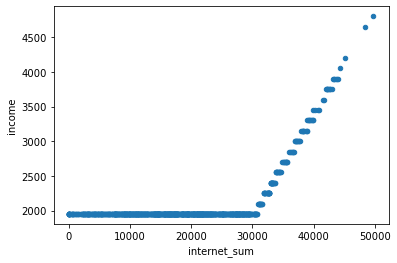

In [39]:
df.loc[df['tariff'] == 'ultra',['income','internet_sum']].plot(y='income',x='internet_sum', kind='scatter')

<AxesSubplot:xlabel='calls_sum', ylabel='income'>

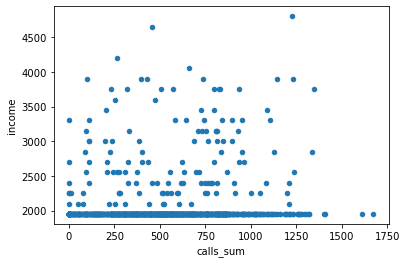

In [40]:
df.loc[df['tariff'] == 'ultra',['income','calls_sum']].plot(y='income',x='calls_sum', kind='scatter')

<AxesSubplot:xlabel='messages_count', ylabel='income'>

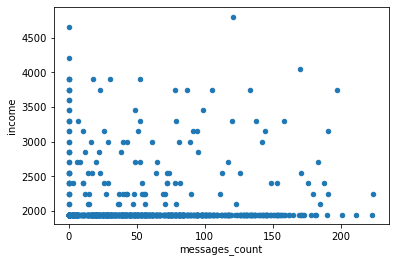

In [41]:
df.loc[df['tariff'] == 'ultra',['income','messages_count']].plot(y='income',x='messages_count', kind='scatter')

По графикам можно сказать, что с увеличением расходов интернета у пользователей также пропорционально увеличивается показатели выручки. Показатели расхода звонков и сообщений не показывают такой зависимости. 